In [119]:
# In exploratory data analysis, we often want to visualize the distribution of a variable.
 # This can be done using a histogram,heatmaps, pairplot etc. which shows the frequency of values in bins.
 # exploratory data analysis (EDA) is a critical step in the data science process.
# It helps us understand the data, identify patterns, and prepare for modeling.

In [120]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv(path + '/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


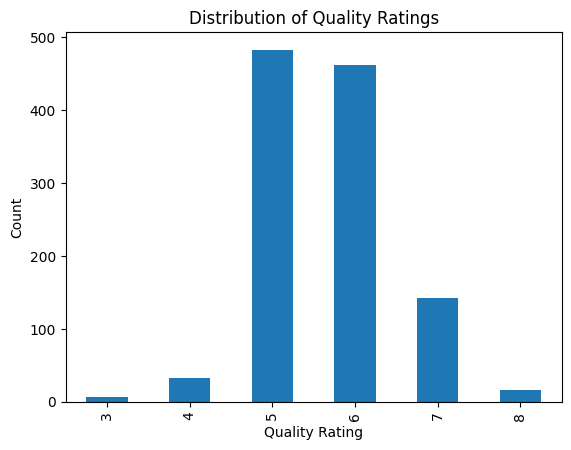

In [123]:
# Check for missing values
df.isnull().sum()
#If values are missing then we use imputation techniques to fill the missing values
# Now chwck the info of the dataset to get the colummn names, their dtypes and non-null count
df.info()
#Now check the shape of dataset
df.shape
# Check for duplicates
df.duplicated()
#If there are duplicates then we can remove them using drop_duplicates() method
# To check the count of any particular column we can use value_counts() method
df['quality'].value_counts()
# Now check the distribution of the target variable
df['quality'].value_counts().sort_index().plot(kind='bar') # Plotting the distribution of quality ratings and using value_counts() to get the count of each quality rating and sort them in ascending order
# If we remove sort_index() then the bars will be in random order
plt.title('Distribution of Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()


In [124]:
# To have the 5 number summary of each column of the dataset we can use describe() method
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [125]:
# To get the columns names we can use columns attribute of the dataframe
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

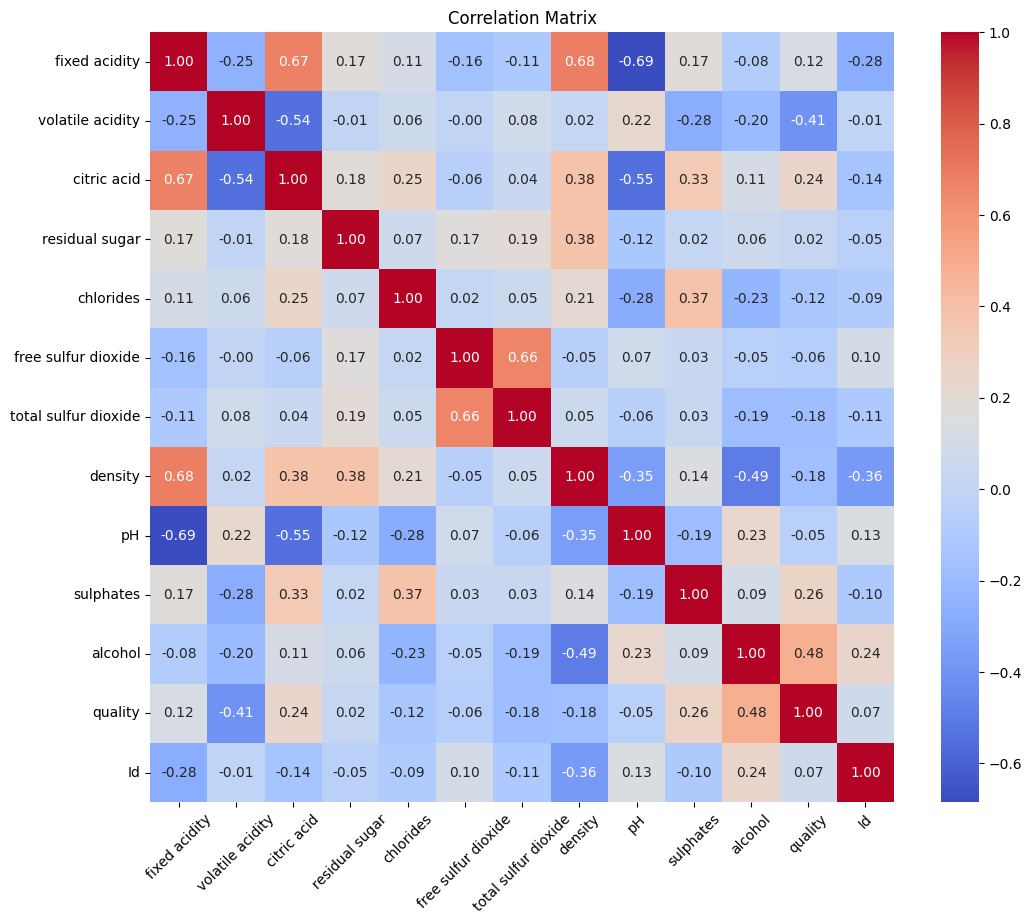

In [126]:
# To see the correlation between the features we use corr() method
df.corr()
# To visualize the correlation we use heatmap() method of seaborn
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f') # annot=True to show the correlation values on the heatmap, cmap='coolwarm' to use coolwarm color palette, fmt='.2f' to format the correlation values to 2 decimal places
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.yticks(rotation=0) # Rotate y-axis labels for better readability
plt.title('Correlation Matrix')
plt.show()

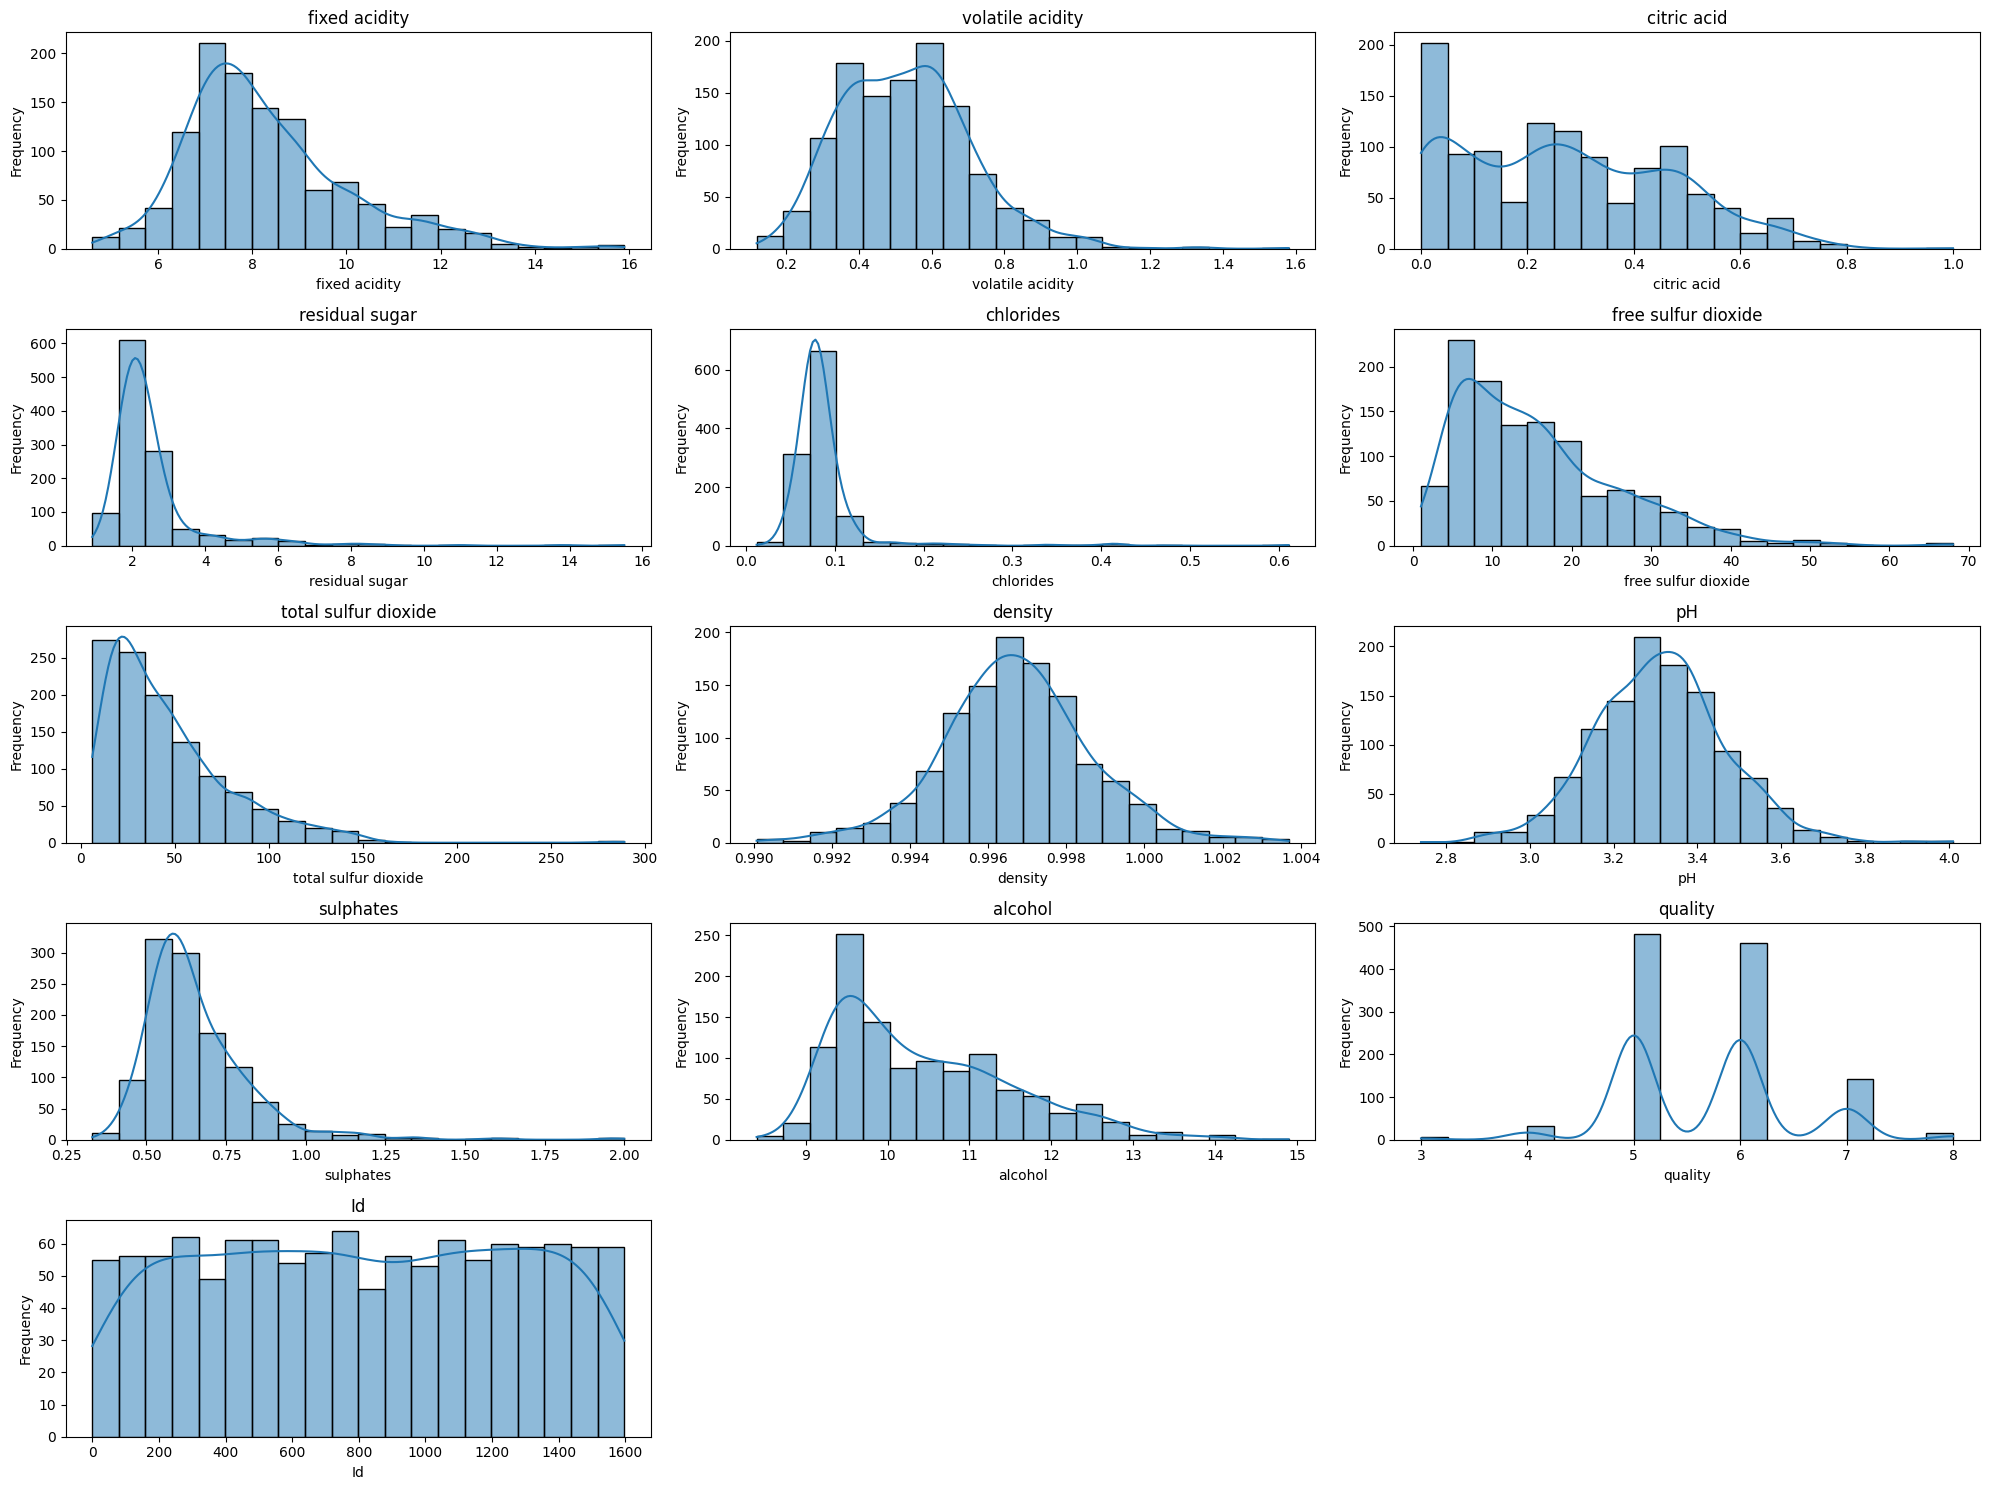

: 

In [ ]:
# Visualize the distribution of each feature using histograms
plt.figure(figsize=(20,15), frameon=True) # Set the figure size and frameon=True to show the frame
plt.tight_layout() #This will adjust the layout to prevent overlap
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i + 1) # Adjust the grid to 5 rows and 3 columns to fit all 13 columns
    sns.histplot(df[col], bins=20, kde=True) # kde=True to plot the kernel density estimate
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout() # Adjust the layout to prevent overlap
plt.show()

In [ ]:
# And to check if the dataset is imbalanced or not we can use pairplot() method of seaborn
sns.pairplot(df, hue='quality',kind='reg', diag_kind='kde') # hue='quality' to color the points based on quality rating, diag_kind='kde' to plot kernel density estimate on the diagonal
plt.suptitle('Pairplot of Wine Quality Dataset', y=1.02) # Set the title and adjust the position
plt.show()
# Pairplot is a great way to visualize the relationship between features and the target variable
# It helps us identify the features that are most correlated with the target variable and can help us in feature selection
# Pairplot is good for univariate and bivariate and multivariate analysis.

# We can also use scatterplot() method to visualize the relationship between two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='citric acid', hue='quality', data=df) # hue='quality' to color the points based on quality rating
plt.title('Scatterplot of Fixed Acidity vs Citric Acid')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.show()


Text(0, 0.5, 'count')

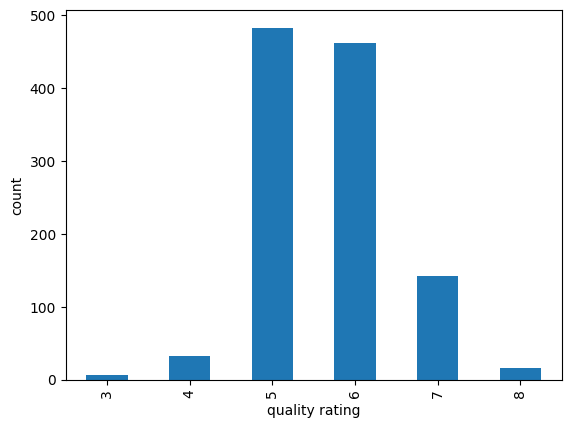

In [ ]:
df.quality.value_counts().sort_index().plot(kind='bar') # Plotting the distribution of quality ratings and using value_counts() to get the count of each quality rating and sort them in ascending order
plt.xlabel('quality rating')
plt.ylabel('count')

<Figure size 3000x1000 with 0 Axes>

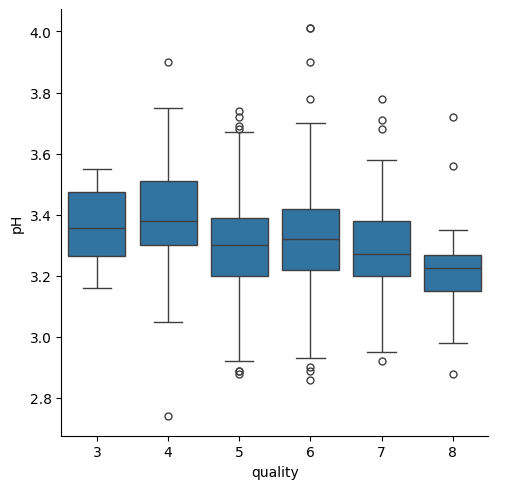

In [ ]:
# To see categorical plots we can use catplot() method of seaborn
plt.figure(figsize=(30,10))
plt.tight_layout
sns.catplot(x='quality', y='pH', kind='box', data=df)
plt.show()

## Flight price prediction

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import openpyxl


In [35]:
path = kagglehub.dataset_download("nikhilmittal/flight-fare-prediction-mh")

In [36]:
print("Path to dataset files:", path)
df = pd.read_excel(path + '\Data_Train.xlsx')


Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\nikhilmittal\flight-fare-prediction-mh\versions\1


In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [38]:
# Getting the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [39]:
# Checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [41]:
# getting the 5 number summary of the dataset
df.describe(exclude='object') # exclude='object' will exclude the object type columns from the summary and include is used to include the object type columns in the summary
# df.describe is only showing the numerical columns of the dataset which is the Price column
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# Since most of the feature have object dtype we need to convert them into numerical values
# We will start fetaure engineering by converting the object type columns into numerical values


In [43]:
# Creating separate columns for Date, Month and Year from the Date_of_Journey column
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

# # conversion of Date_of_Journey column into numerical values
df['Date'] = df["Date"].astype(int)
df['Month'] = df["Month"].astype(int)
df['Year'] = df["Year"].astype(int)


In [44]:
# Since we have separated columns for date of journey we can drop the Date_of _journey column
df.drop(columns=["Date_of_Journey"],inplace=True, axis=1)


In [47]:
# Now we will convert the Arrival time column into numerical values
df['Time'] = df['Arrival_Time'].str.split(' ').str[0]
df['hours'] = df['Time'].str.split(":").str[0]
df['minutes'] = df['Time'].str.split(":").str[1]
#conversion to numerical values
df['hours'] = df['hours'].astype(int)
df['minutes'] = df['minutes'].astype(int)

# # Dropppping the Arrival_Time column as we have already converted it into numerical values
df.drop(columns='Arrival_Time', axis=1, inplace=True)

In [48]:
df.rename(columns={'hours':'arrival_hours', 'minutes': 'arrival_minutes'}, inplace=True)

In [49]:
df.drop(columns='Time',inplace=True, axis=1)

In [51]:
# Now for dep_time 
df1 = pd.read_excel(path + '\Data_Train.xlsx')
df['Dep_Time'] = df1['Dep_Time']
# df.head()
df['dept_hours'], df['dept_minutes'] = df['Dep_Time'].str.split(':').str[0], df['Dep_Time'].str.split(':').str[1] # this apply method will split the Dep_Time column into two columns hours and minutes
# and we will convert them into numerical values directly

In [52]:
# Droppping the Dep_Time colummn 
df.drop(columns='Dep_Time', inplace=True, axis=1)

In [53]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,arrival_hours,arrival_minutes,dept_hours,dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [54]:
# Now for categorical columns we will use get_dummies() method to convert them into numerical values
df['Total_Stops'].sort_index().unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [56]:
df[df['Total_Stops'].isnull()] # This will give us the rows where Total_Stops column is null
# We can see that the null values are in the last column of the dataset
# Now we will use mapping to convert the Total_Stops column into numerical values using ordinal encoding
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [57]:
df['Total_Stops'].sort_index().unique()

array([0, 2, 1, 3, 4])

In [94]:
# Now we don't need the feature Route as it is not useful for us
# df.drop(columns='Route', inplace=True, axis=1)
df.head(3)

,Airline,Duration,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,arrival_hours,arrival_minutes,dept_hours,dept_minutes
0,IndiGo,2h 50m,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,7h 25m,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,19h,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,09,25


In [135]:
# Also to change the duration column into numeric value
# df.drop(columns='Duration', inplace=True, axis=1)
# df.insert(column='Duration', loc=1, value=df1['Duration'])
# try:
#     for i in range(len(df['Duration'])):
#         if 'h' in df["Duration"][i].strip() and 'm' in df["Duration"][i].strip():
#             continue
#         elif not 'h' in df["Duration"][i].strip():
#             df['Duration'][i] = df['Duration'][i] + '0h '
#         elif not 'm' in df["Duration"][i].strip():
#             df['Duration'][i] = df['Duration'][i] + ' 0m'
# except SettingWithCopyWarning:
#     pass
# df.head() 
# duration_hrs = pd.DataFrame(df['Duration'].str.extract(r'(\d+)h'))
# duration_hrs = duration_hrs.fillna(0).astype(int) # This will extract the hours from the Duration column and fill the null values with 0 and convert them into int type
# duration_min = pd.DataFrame(df['Duration'].str.extract(r'(\d+)m'))
# duration_min = duration_min.fillna(0).astype(int)
# duration_hrs.info(),duration_min.info()
# df['Duration_in_min'] = duration_hrs*60 + duration_min
# df.drop(columns='Duration', inplace=True, axis=1)
df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,arrival_hours,arrival_minutes,dept_hours,dept_minutes,Duration_in_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,05,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,09,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,05,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


In [141]:
# For other columns like Destination, Airline, Source we will use nominal/OHE encoder to convert them into numerical values
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df2 = pd.DataFrame(encoder.fit_transform(df[['Source', 'Destination', 'Airline']]).toarray(), columns=encoder.get_feature_names_out())
df2.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
df3 = pd.concat([df,df2], axis=1) # This will concatenate and return a new dataframe with the original dataframe and the new dataframe with the encoded columns
df3.drop(columns=['Source', 'Destination', 'Airline'], inplace=True, axis=1) # Dropping the original columns as we have already converted them into numerical values
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Additional_Info                            10683 non-null  object 
 2   Price                                      10683 non-null  int64  
 3   Date                                       10683 non-null  int64  
 4   Month                                      10683 non-null  int64  
 5   Year                                       10683 non-null  int64  
 6   arrival_hours                              10683 non-null  int64  
 7   arrival_minutes                            10683 non-null  int64  
 8   dept_hours                                 10683 non-null  object 
 9   dept_minutes                               10683 non-null  object 
 10  Duration_in_min       

In [148]:
df3['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)